### Achilles Edwin Alfred Saxby
### aes807
### Applied Data Science - Homework_5

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import datasets

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## ---------------------------------------------------------------------------------------------------------

### 1 (10 pts)
Which of the following (select all that apply) is true for the binary classification confusion matrix report:
* a) it reports sizes of each cluster and number of the clusters;
* b) it is a square matrix;
* c) it is symmetrical;
* d) it has dimensions $2\times2$;
* e) it has dimensions $3\times3$;
* f) it reports the quality of classification fit over the test set;
* g) it reports the percentage of correctly classified datapoints over the test set;
* h) it reports the percentage of incorrectly classified datapoints over the test set;

#### The solutions for Question-1 are:
* a) It reports sizes of each cluster and number of the clusters
* b) It is a square matrix
* d) It has dimensions $2\times2$
* f) It reports the quality of classification fit over the test set

#### Solutions that are confusing based on the question:
* g) Not quite sure if this is the answer, but after getting the results, the percentages can be calculated
* h) Not quite sure if this is the answer, but after getting the results, the percentages can be calculated
* Both these percentages can be found just looking at the values that the confusion matric gives as output

## ---------------------------------------------------------------------------------------------------------

### 2 (36 pts = 2+4+4+4+7$\times$2+8)
Read the data from https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/HWlogreg2.csv
and then use the first half as the training set, and the second half as the test set.
1. Initiate a logistic regression object for modeling, setting C = 10,000 to disable regularization
2. Run logistic regression on the training set
3. Print out the fitted parameters (including the intercept)
4. Use these parameters to predict on the test set
5. Draw two plots, first one showing your prediction, second one for the actual labels, with decision boundary in both
6. Calculate the confusion matrix to evaluate the model's performance, print out accuracy, recall and precision

In [3]:
data = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/HWlogreg2.csv')  
data.head()

,x1,x2,y
0,1.103418,5.160703,0.0
1,0.754804,5.846008,0.0
2,-1.651331,7.416112,0.0
3,-2.502233,7.799007,0.0
4,-0.183246,9.076321,0.0


In [4]:
data.count()

x1    200
x2    200
y     200
dtype: int64

#### Splitting the sample into Training and Test Sets

In [5]:
training_set = data.iloc[0:100]
training_set.count()

x1    100
x2    100
y     100
dtype: int64

In [6]:
test_set = data.iloc[100:200]
test_set.count()

x1    100
x2    100
y     100
dtype: int64

In [7]:
training_set.head()

,x1,x2,y
0,1.103418,5.160703,0.0
1,0.754804,5.846008,0.0
2,-1.651331,7.416112,0.0
3,-2.502233,7.799007,0.0
4,-0.183246,9.076321,0.0


In [8]:
test_set.head()

,x1,x2,y
100,8.009730,1.180780,1.0
101,7.731068,3.895626,1.0
102,3.265181,0.993105,1.0
103,1.979547,6.951940,0.0
104,9.329247,-3.080326,1.0


#### Visualizing the Data

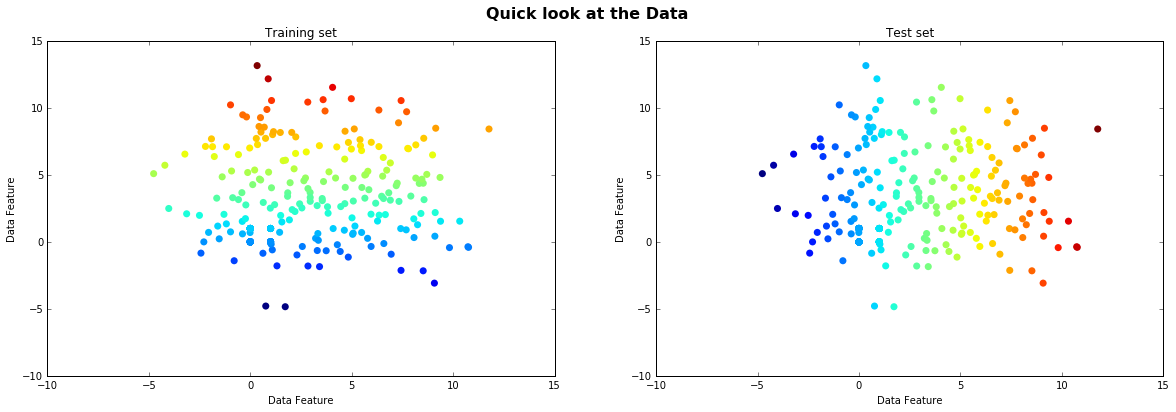

In [9]:
fig1 = plt.figure(figsize = (20,6))
plt.suptitle("Quick look at the Data", fontsize = 16, fontweight = 'bold')

ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)

ax1.scatter(training_set, test_set, lw = 0, s = 50, c = data[100:])
ax2.scatter(training_set, test_set, lw = 0, s = 50, c = data[0:100])

ax1.set(title = 'Training set', xlabel= 'Data Feature', ylabel= 'Data Feature')
ax2.set(title = 'Test set', xlabel= 'Data Feature', ylabel= 'Data Feature')

#### Logistic Regression

- Initiate a logistic regression object for modeling, setting C = 10,000 to disable regularization
- Running logistic regression on the training_set

In [41]:
logit = LogisticRegression(C=10000)
logit.fit(np.c_[training_set.x1[:], training_set.x2[:]], training_set.y[:])

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- Fitted parameters(including the intercept)

In [42]:
print 'The Coefficients are: ',logit.coef_
print 'The Intercept is: ', logit.intercept_

The Coefficients are:  [[ 0.72154944 -0.698117  ]]
The Intercept is:  [-0.55291798]


- Predicting the test set

In [45]:
labelPred = logit.predict(np.c_[test_set.x1[:], test_set.x2[:]])
labelActual = test_set.y[:]

In [47]:
pylab.rcParams['image.cmap'] = 'RdBu'

- Visualization
- Decision Boundary

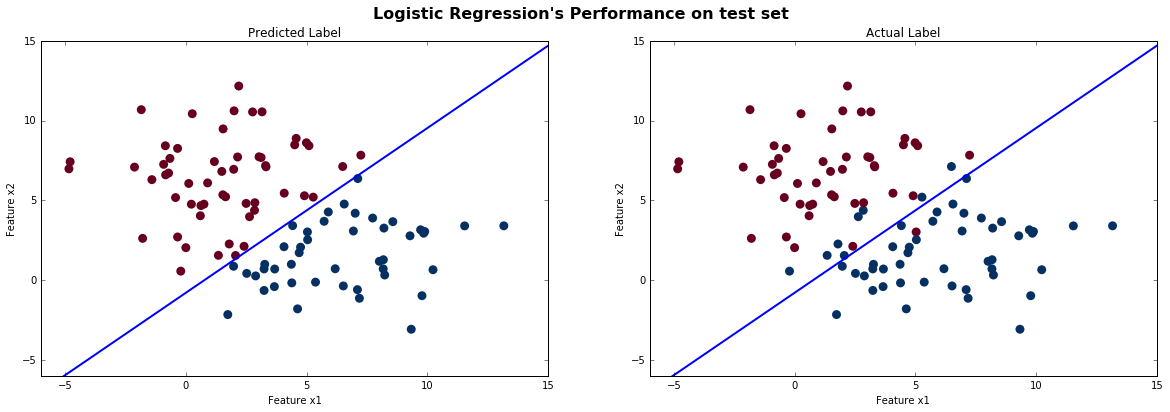

In [55]:
fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 16, fontweight = 'bold')
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)

xplot = np.linspace(-10,15,200)
yplot = -(logit.intercept_[0] + logit.coef_[0][0]*xplot)/logit.coef_[0][1]

ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label', xlim = [-6,15], ylim = [-6,15], xlabel= 'Feature x1', ylabel= 'Feature x2')
ax2.set(title='Actual Label', xlim = [-6,15], ylim = [-6,15], xlabel= 'Feature x1', ylabel= 'Feature x2')

ax1.scatter(test_set.x1[:], test_set.x2[:], lw = 0, s = 80, c = labelPred)
ax2.scatter(test_set.x1[:], test_set.x2[:], lw = 0, s = 80, c = labelActual)

plt.show()

#### The above figure shows the clustering labels in both actual and predicted model for the given test data
#### As seen in the "actual label" plot, the predicted decision boundary does not split the groups of actual labels perfectly

- Calculating the confusion matrix to evaluate the model's performance

In [58]:
print 'Confusion Matrix: \n', confusion_matrix(labelPred, labelActual)

Confusion Matrix: 
[[47  8]
 [ 1 44]]


- Manually calculating the variables of the confusion matrix

In [64]:
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

print('\nTP = %d, TN = %d, FP = %d, FN = %d'%(TP,TN,FP,FN))


TP = 44, TN = 47, FP = 1, FN = 8


- Computing the Precision, Accuracy and Recall

In [74]:
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)

print('\nPrecision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))


Precision = 97.78%
Accuracy = 91.00%
Recall = 84.62%


#### The values of Accuracy, Precision and Sensitivity Recall are pretty high when calculated here
#### That means the model's preformance is good, the model can now be trusted to be pretty accurate

## ---------------------------------------------------------------------------------------------------------

### 3 (54pts = 4+4+5+10$\times$2+9+6$\times$2) (Extra credit 10pts in part 4)
Recall the last example of logistic regression where we were dealing with 3 classes based on the Iris data set, but we've only used the first two features, now let's try the other two.
1. Load Iris data from sklearn.datasets
2. Set up X and Y, where X includes the last two features and Y is the target variable (the labels)
3. Similarly, fit the whole dataset with LogisticRegression (No need to split the data into training and test)
4. Visualize the data by:
    * Draw a scatter plot of the data, paint the points with different colors if they are labeled differently
    * Draw the decision boundary *(10 extra points for painting the partition areas)*
5. Calculate and print out the confusion matrix
6. Calculate:
    * The precision of class 0 (the true first class among all predicted first class)
    * The accuracy of the model (correct labels)

#### Set up X and Y, where X includes the last two features and Y is the target variable (the labels)

In [75]:
iris = datasets.load_iris()

#### Taking only the first two features.

In [76]:
X = iris.data[:, 2:]
Y = iris.target

#### Fitting the whole dataset with LogisticRegression (No need to split the data into training and test)

In [77]:
logreg = LogisticRegression(C = 1e6)
logreg.fit(X, Y)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Visualize the data by:
- Draw a scatter plot of the data, paint the points with different colors if they are labeled differently
- Draw the decision boundary (10 extra points for painting the partition areas)

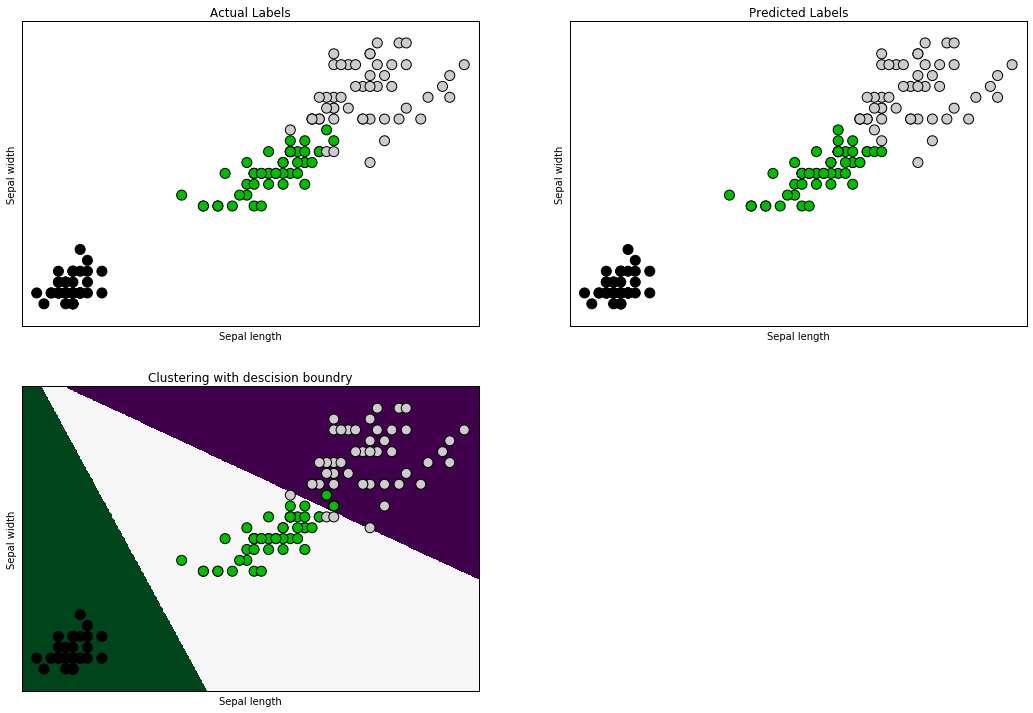

In [91]:
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 600), np.linspace(y_min, y_max, 600))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
pre = logreg.predict(np.c_[X[:,0],X[:,1]])

fig4 = plt.figure(3, figsize=(18, 12))
ax1, ax2, ax3 = fig4.add_subplot(221), fig4.add_subplot(222), fig4.add_subplot(223)

# Plot the dots with labels only
ax1.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax1.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())),
       title = 'Actual Labels')

# Plot the dots with predicted labels only
ax2.scatter(X[:, 0], X[:, 1], c=pre, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax2.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())),
       title = 'Predicted Labels')

# Plot the decision boundaries and the partition areas
ax3.pcolormesh(xx, yy, Z, cmap = plt.cm.PRGn_r)
ax3.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax3.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())),
       title = 'Clustering with descision boundry')

plt.show()

- The above figures show the clustering of the IRS data 
- In the last figure that has been clustered with the decision boundary - we notice that some of the actual labels are not predicted correctly

#### Calculate and print out the confusion matrix

- Calculating the confusion matrix to evaluate the model's performance

In [92]:
print 'Confusion Matrix: \n', confusion_matrix(pre, Y)

Confusion Matrix: 
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


- Manually Calculate variables of confusion matrix

In [96]:
TP2 = sum((pre==2)&(Y==2))
TP1 = sum((pre==1)&(Y==1))
TP0 = sum((pre==0)&(Y==0))

F21 = sum((pre==2)&(Y==1))
F20 = sum((pre==2)&(Y==0))

F12 = sum((pre==1)&(Y==2))
F10 = sum((pre==1)&(Y==0))

F02 = sum((pre==0)&(Y==2))
F01 = sum((pre==0)&(Y==1))
print('\nT2 = %d, T1 = %d, T0= %d, F21 = %d, F20 = %d, \
F12 = %d, F10 = %d, F02 = %d, F01 = %d'%(TP2,TP1,TP0,F21,F20,F12,F10,F02,F01))


T2 = 47, T1 = 47, T0= 50, F21 = 3, F20 = 0, F12 = 3, F10 = 0, F02 = 0, F01 = 0


#### Calculate:
- The precision of class 0 (the true first class among all predicted first class)
- The accuracy of the model (correct labels)

In [101]:
ACC1 = 100.0 * (TP2+TP1+TP0)/(TP2+TP1+TP0+F21+F20+F12+F10+F02+F01)
PRE0 = 100.0 * (TP0)/(TP0+F02+F01)

print 'Precision of class 0:', PRE0
print 'Accuracy of model:', ACC1

Precision of class 0: 100.0
Accuracy of model: 96.0


#### The values of Accuracy and Precision are relatively very high when calculated
#### That means the model's preformance is excellent considering the values shown above
#### The model can now be trusted to be pretty accurate

## ---------------------------------------------------------------------------------------------------------